In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

### Part 1: Voiced/Unvoiced Detector

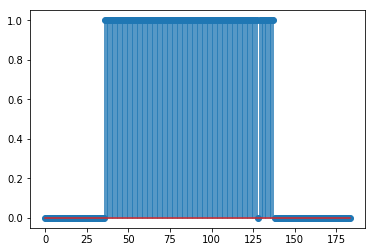

In [35]:
FRAME_SIZE = 2048

def ece420ProcessFrame(frame):
    isVoiced = 0

    #### YOUR CODE HERE ####
    
    energy = np.sum(np.array(np.abs(frame))**2)
    #print(energy)
    
    if energy > 2000000000 : 
        isVoiced = 1 
        
    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

### Part 2: Autocorrelation

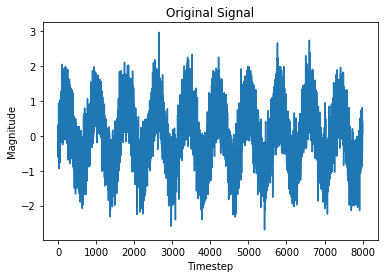

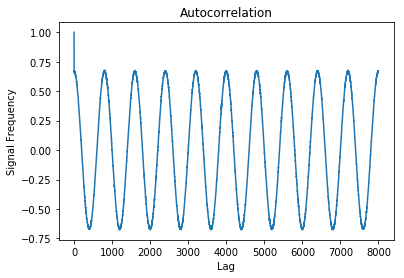

In [37]:
fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.plot(tune)
plt.title("Original Signal")
plt.ylabel("Magnitude")
plt.xlabel("Timestep")

# Start a new figure for your autocorrelation plot 
plt.figure() 

# Your code here
N = len(tune)
total_auto = []


for l in range (N) : 

    auto_corr = [tune[n] * tune[n-l]  for n in range(N-1)]
    auto_corr = np.sum(auto_corr)
    
    total_auto.append(auto_corr)

total_auto = total_auto/np.sum(np.square(tune))

plt.plot(total_auto)
plt.title("Autocorrelation")
plt.ylabel("Signal Frequency")
plt.xlabel("Lag")



# Only call plt.show() at the very end of the script 
plt.show()

In [22]:
freq = max(total_auto)
lag = total_auto.index(freq)

print("Lag Value:", lag)
print("Freq Value:", freq)

Lag Value: 3250
Freq Value: 19181.331980931252
